In [54]:
%pylab inline
import pyfits 
import healpy
from scipy.interpolate import RegularGridInterpolator
import Tools

def SampleCartesianMap(fits, E_min, E_max, nside, E_bins=5):
    """
    Given a cartesian fits mapcube and energy range, returns a spectrally weighted average diffuse model
    in units of (s cm^2)^-1.  Just need to multiply by effective area and PSF in order to
    params: 
        fits: fits filename.  Assumed to run from -180, 180 and -90,-90 and have energy keywords like fermi diffuse model
        E_min: Min energy in MeV 
        E_max: Max energy in MeV 
        nside: healpix nside
        E_bins: Number of subbins for integration. 
    returns:
        Healpix pixels with units in (s cm^2)^-1
    """
    hdu = pyfits.open(fits)
    
    # Define the grid spacings 
    energies = np.log10([e[0] for e in hdu[1].data])
    lats = np.linspace(-90,90,hdu[0].header['NAXIS2'])
    lons = np.linspace(-180,180,hdu[0].header['NAXIS1'])
    print 10**energies
    # Build the interpolator
    rgi = RegularGridInterpolator((energies,lats,lons), hdu[0].data, method='linear',
                                  bounds_error=False, fill_value=np.float32(0.))
    # Init the healpix grid and compute the energy bins.
    master = np.zeros(12*nside**2)
    bin_edges = np.logspace(np.log10(E_min), np.log10(E_max),E_bins+1)
    # Get the latitude and longitude.
    l, b = Tools.hpix2ang(np.arange(12*nside**2))
    idx = np.where(l>180)[0]
    l[idx] -= 360.
    
    
    for i_E in range(len(bin_edges)-1): 
        central_energy = 10.**(0.5*(np.log10(bin_edges[i_E]) +np.log10(bin_edges[i_E+1])))
        print central_energy
        bin_width = bin_edges[i_E+1]-bin_edges[i_E]
        # Units of diffuse model are (sr s cm^2 MeV)^-1
        master += rgi((np.log10(central_energy),b,l))*bin_width

    # Units of returned model are (s cm^2)^-1
    return master*healpy.pixelfunc.nside2pixarea(nside)
    
hpix = SampleCartesianMap('/home/carlson/fermitools/refdata/fermi/galdiffuse/gll_iem_v05.fits', 1000, 2e3, 256)

Populating the interactive namespace from numpy and matplotlib
[  5.84731331e+01   7.99703598e+01   1.09370895e+02   1.49580322e+02
   2.04572464e+02   2.79782074e+02   3.82641968e+02   5.23317566e+02
   7.15711548e+02   9.78837830e+02   1.33870056e+03   1.83086426e+03
   2.50396851e+03   3.42453467e+03   4.68354053e+03   6.40541064e+03
   8.76031445e+03   1.19809814e+04   1.63857031e+04   2.24097910e+04
   3.06485918e+04   4.19163281e+04   5.73265664e+04   7.84022734e+04
   1.07226313e+05   1.46647297e+05   2.00561125e+05   2.74296000e+05
   3.75138969e+05   5.13056156e+05]
1071.77346254
1231.14441334
1414.21356237
1624.50479271
1866.06598307


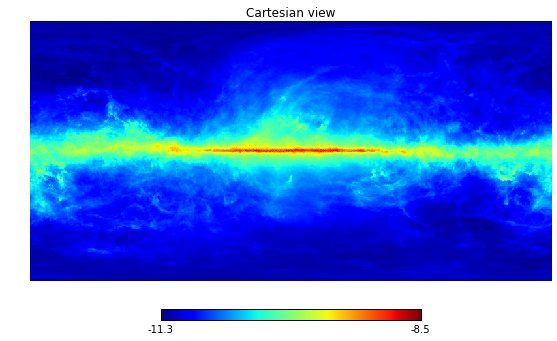

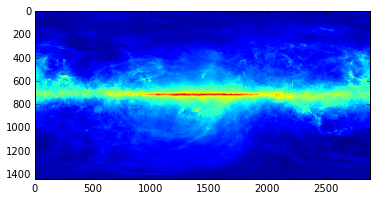

In [56]:
healpy.cartview(np.log10(hpix))
plt.show()
plt.imshow(np.log10(pyfits.open('/home/carlson/fermitools/refdata/fermi/galdiffuse/gll_iem_v05.fits')[0].data[10]))

In [41]:
-10%360

350